# Project Title: Email Spam Classification using NLP with Streamlit Implementation

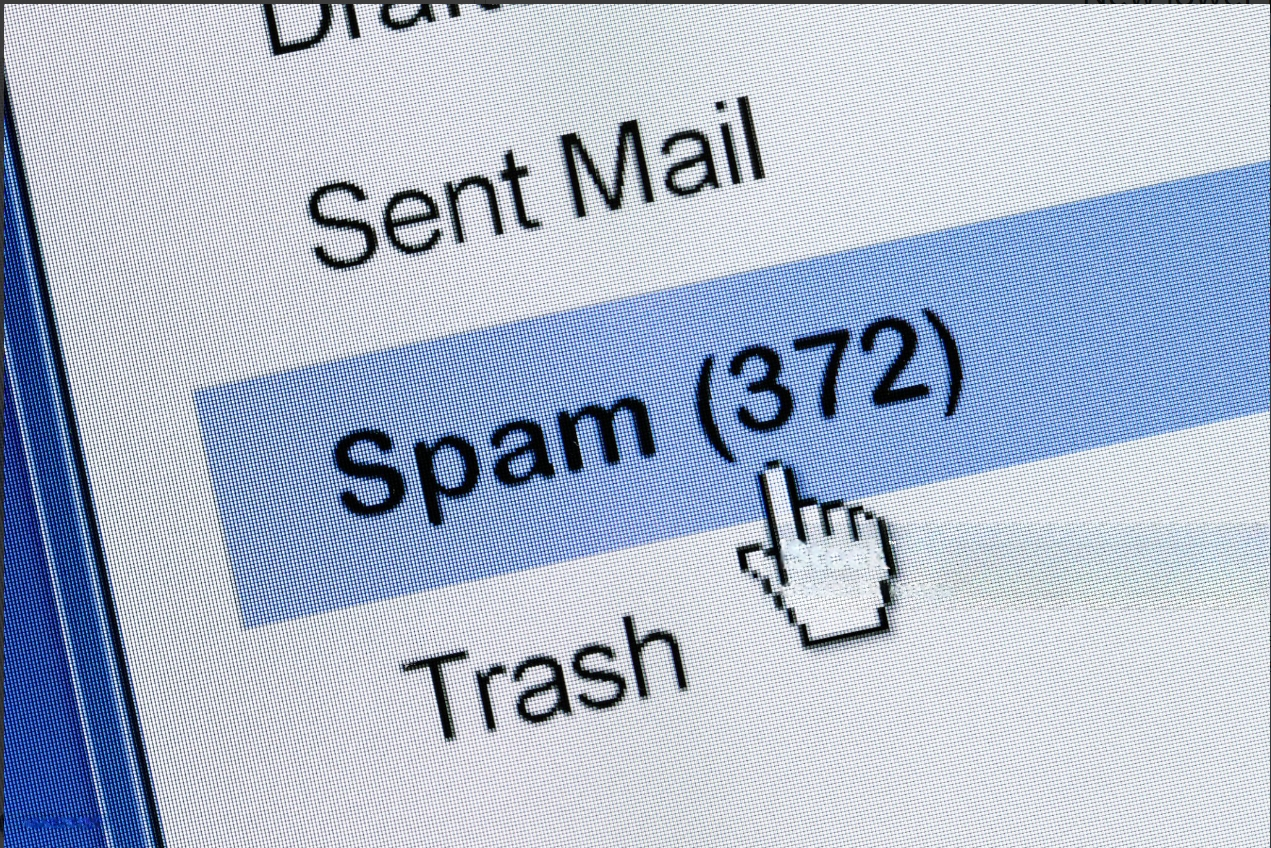

In [31]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='email_spam.png',height=300,width=600))

## 1. Introduction:
> Email spam remains a pervasive issue, clogging inboxes and posing security risks. This project addresses the challenge of automatic email spam classification using Natural Language Processing (NLP) techniques. By leveraging advanced machine learning algorithms and a user-friendly interface developed with Streamlit, we aim to provide an efficient and intuitive solution for identifying and filtering out spam emails.

## 2. Business Goals:

> Enhance Email Security: Minimize the risk of users falling victim to phishing attacks or malicious content by accurately classifying spam emails.
Optimize Productivity: Streamline users' email experience by reducing the clutter caused by irrelevant or potentially harmful messages.
Improve User Experience: Create a seamless and intuitive email filtering system that requires minimal user intervention.

## 3. Relevance of the Project:

> Growing Email Volume: With the increasing volume of emails, an automated spam classification system becomes crucial for managing overwhelming inboxes.
Security Concerns: As email continues to be a major communication channel, the need for robust spam filters is essential to protect users from phishing attempts and malware.
User Convenience: Enhancing the user experience by reducing the time spent sifting through spam, allowing users to focus on important and legitimate emails.

## 4. Technical Approach:

> NLP Techniques: Utilize NLP for text analysis to extract meaningful features from email content, enabling the model to distinguish between legitimate and spam messages.
Machine Learning Algorithms: Implement state-of-the-art machine learning algorithms for training a robust spam classification model, ensuring high accuracy and reliability.
Streamlit Implementation: Develop a user-friendly web application using Streamlit, providing an intuitive interface for users to interact with the spam classification system.

## 5. Project Scope:

> Email Types: Initially focus on the classification of text-based emails. Future iterations may include the incorporation of multimedia content.
Scalability: Design the system to handle a scalable number of emails and users.

### IMPORTING LIBRARIES

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

### LOADING DATASET

In [33]:
df=pd.read_excel(r"C:\Users\jhonn\Downloads\sinsagar program\email_spam.xlsx")
df

Column1                                            Subject     isspam
0            0            Confidential :Soma:, Ci@lis, :P:ntermin      spam 
1            1  ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...      spam 
2            2                                                NaN      spam 
3            3               StOck 0ppurtunities - their sh0Oting      spam 
4            4                    CP&L tariff changes (ER01-1807)  not spam 
...        ...                                                ...        ...
37884    37884  frustum XANAAX, TUSSI0NEEX, C1AL1IS, \/11AGRRA...      spam 
37885    37885                         Get PAYPERVIEW FOR_NOTHING      spam 
37886    37886                         RE: Nice Mmos wants a date      spam 
37887    37887              Get_All Premeium_Movie channels _Free      spam 
37888    37888  =?utf-8?q?Same medicine -- gno?=_x000D_\n =?ut...      spam 

[37889 rows x 3 columns]

In [34]:
df.head()

Column1                                            Subject     isspam
0        0            Confidential :Soma:, Ci@lis, :P:ntermin      spam 
1        1  ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...      spam 
2        2                                                NaN      spam 
3        3               StOck 0ppurtunities - their sh0Oting      spam 
4        4                    CP&L tariff changes (ER01-1807)  not spam

In [35]:
df.tail()

Column1                                            Subject isspam
37884    37884  frustum XANAAX, TUSSI0NEEX, C1AL1IS, \/11AGRRA...  spam 
37885    37885                         Get PAYPERVIEW FOR_NOTHING  spam 
37886    37886                         RE: Nice Mmos wants a date  spam 
37887    37887              Get_All Premeium_Movie channels _Free  spam 
37888    37888  =?utf-8?q?Same medicine -- gno?=_x000D_\n =?ut...  spam

In [36]:
df.shape

(37889, 3)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37889 entries, 0 to 37888
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  37889 non-null  int64 
 1   Subject  36936 non-null  object
 2   isspam   37889 non-null  object
dtypes: int64(1), object(2)
memory usage: 888.2+ KB


In [38]:
df.describe()

Column1
count  37889.000000
mean   18944.000000
std    10937.756511
min        0.000000
25%     9472.000000
50%    18944.000000
75%    28416.000000
max    37888.000000

In [39]:
df.isna().sum()

Column1      0
Subject    953
isspam       0
dtype: int64

In [40]:
df.duplicated().sum()

0

### Observations

>* The dataset consists of 37,889 entries with three columns: 'Column1,' 'Subject,' and 'isspam.'
>* 'Column1' is of integer type, and 'Subject' and 'isspam' are of object types.  
>* There are 953 missing values in the 'Subject' column.
>* 'Subject' is a crucial column, and addressing these missing values is essential for a complete dataset.  
>* The 'isspam' column appears to be the target variable, indicating whether an email is spam or not.
>* The distribution of classes in the 'isspam' column needs exploration to understand the balance between spam and non-spam emails. 
>* Cleaning the 'Subject' column is crucial, involving the removal or handling of special characters and addressing missing values.
>* Dropping unwanted columns

In [41]:
df.drop(['Column1'],axis=1,inplace=True)


In [42]:
df.dropna(inplace=True)
df.shape

(36936, 2)

In [43]:
df=df.rename(columns={'isspam': 'Label'})

In [44]:
df.head()

Subject      Label
0            Confidential :Soma:, Ci@lis, :P:ntermin      spam 
1  ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...      spam 
3               StOck 0ppurtunities - their sh0Oting      spam 
4                    CP&L tariff changes (ER01-1807)  not spam 
5                        IM draft - Florida Projects  not spam

In [45]:
df['Label']=df['Label'].map({'not spam ':0,'spam ':1})
df

Subject  Label
0                Confidential :Soma:, Ci@lis, :P:ntermin      1
1      ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...      1
3                   StOck 0ppurtunities - their sh0Oting      1
4                        CP&L tariff changes (ER01-1807)      0
5                            IM draft - Florida Projects      0
...                                                  ...    ...
37884  frustum XANAAX, TUSSI0NEEX, C1AL1IS, \/11AGRRA...      1
37885                         Get PAYPERVIEW FOR_NOTHING      1
37886                         RE: Nice Mmos wants a date      1
37887              Get_All Premeium_Movie channels _Free      1
37888  =?utf-8?q?Same medicine -- gno?=_x000D_\n =?ut...      1

[36936 rows x 2 columns]

In [46]:
#num of characterrs
df['num_of_characters']=df['Subject'].apply(len)
df

Subject  Label  \
0                Confidential :Soma:, Ci@lis, :P:ntermin      1   
1      ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...      1   
3                   StOck 0ppurtunities - their sh0Oting      1   
4                        CP&L tariff changes (ER01-1807)      0   
5                            IM draft - Florida Projects      0   
...                                                  ...    ...   
37884  frustum XANAAX, TUSSI0NEEX, C1AL1IS, \/11AGRRA...      1   
37885                         Get PAYPERVIEW FOR_NOTHING      1   
37886                         RE: Nice Mmos wants a date      1   
37887              Get_All Premeium_Movie channels _Free      1   
37888  =?utf-8?q?Same medicine -- gno?=_x000D_\n =?ut...      1   

       num_of_characters  
0                     39  
1                     68  
3                     36  
4                     31  
5                     27  
...                  ...  
37884                106  
37885                 26  
37886                 26  
37887                 37  
37888                 63  

[36936 rows x 3 columns]

In [47]:
#num of words
df['no_of_words']=df['Subject'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

Subject  Label  \
0            Confidential :Soma:, Ci@lis, :P:ntermin      1   
1  ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...      1   
3               StOck 0ppurtunities - their sh0Oting      1   
4                    CP&L tariff changes (ER01-1807)      0   
5                        IM draft - Florida Projects      0   

   num_of_characters  no_of_words  
0                 39           13  
1                 68           12  
3                 36            5  
4                 31            8  
5                 27            5

In [48]:
#num of senetence
df['no_of_sentence']=df['Subject'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

Subject  Label  \
0            Confidential :Soma:, Ci@lis, :P:ntermin      1   
1  ¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...      1   
3               StOck 0ppurtunities - their sh0Oting      1   
4                    CP&L tariff changes (ER01-1807)      0   
5                        IM draft - Florida Projects      0   

   num_of_characters  no_of_words  no_of_sentence  
0                 39           13               1  
1                 68           12               2  
3                 36            5               1  
4                 31            8               1  
5                 27            5               1

In [49]:
df.describe()

Label  num_of_characters   no_of_words  no_of_sentence
count  36936.000000       36936.000000  36936.000000    36936.000000
mean       0.522309          38.606021      7.693984        1.078785
std        0.499509          34.914884     13.350424        0.327881
min        0.000000           1.000000      0.000000        0.000000
25%        0.000000          21.000000      4.000000        1.000000
50%        1.000000          32.000000      6.000000        1.000000
75%        1.000000          49.000000      9.000000        1.000000
max        1.000000         517.000000    245.000000        5.000000

> **Label Distribution:** Approximately 52.2% of the emails are labeled as spam (1) and 47.8% as non-spam (0).  
**Number of Characters:** 
The average number of characters in emails is approximately 38.6.
The minimum and maximum number of characters are 1 and 517, respectively.  
**Number of Words:** The average number of words in emails is around 7.7.
The minimum and maximum number of words are 1 and 245, respectively.  
**Number of Sentences:** The average number of sentences in emails is approximately 1.1.
Most emails (75th percentile) contain 1 sentence, with some having up to 5 sentences.  
**Data Spread:** The data spread reveals variability, with standard deviations indicating considerable dispersion in the number of characters, words, and sentences.  
**Data Characteristics:** Emails exhibit diverse lengths, with a range of characters, words, and sentences.
Presence of emails with a minimal number of characters, words, and sentences as well as some with relatively high counts.  
**Modeling Considerations:** Understanding the distribution of these features is crucial for choosing appropriate models and preprocessing steps in email spam classification using NLP.

In [50]:
df[df['Label']==0].describe()

Label  num_of_characters   no_of_words  no_of_sentence
count  17644.0       17644.000000  17644.000000    17644.000000
mean       0.0          32.775164      6.123101        1.020177
std        0.0          20.989593      3.846032        0.149593
min        0.0           1.000000      1.000000        1.000000
25%        0.0          18.000000      3.000000        1.000000
50%        0.0          28.000000      5.000000        1.000000
75%        0.0          44.000000      8.000000        1.000000
max        0.0         239.000000     62.000000        4.000000

In [51]:
df[df['Label']==1].describe()

Label  num_of_characters   no_of_words  no_of_sentence
count  19292.0       19292.000000  19292.000000    19292.000000
mean       1.0          43.938783      9.130676        1.132386
std        0.0          43.261502     17.983358        0.423500
min        1.0           1.000000      0.000000        0.000000
25%        1.0          24.000000      4.000000        1.000000
50%        1.0          35.000000      7.000000        1.000000
75%        1.0          53.000000      9.000000        1.000000
max        1.0         517.000000    245.000000        5.000000

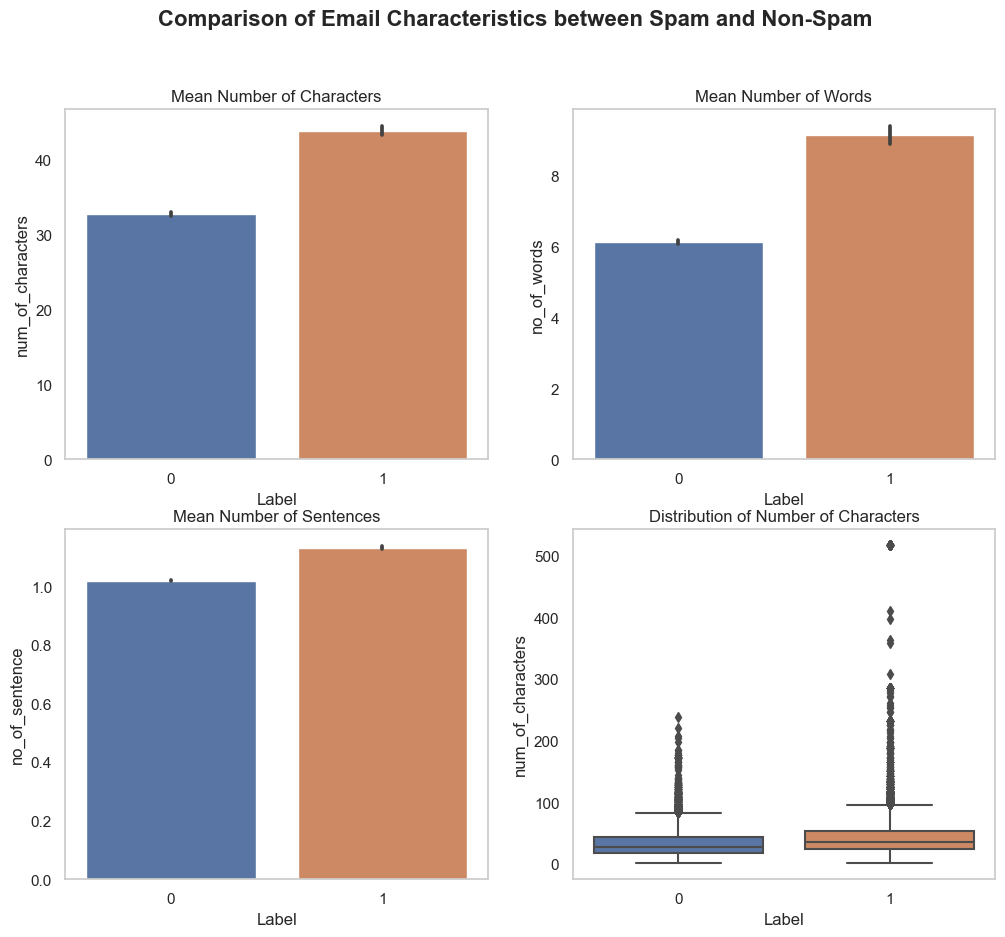

In [52]:
sns.set_palette("Set2")
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.barplot(x='Label', y='num_of_characters', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Mean Number of Characters')

sns.barplot(x='Label', y='no_of_words', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Mean Number of Words')

sns.barplot(x='Label', y='no_of_sentence', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Mean Number of Sentences')

sns.boxplot(x='Label', y='num_of_characters', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Characters')

fig.suptitle('Comparison of Email Characteristics between Spam and Non-Spam', fontsize=16,weight='bold')
for ax in axes.flatten():
    ax.grid(False)


plt.show()

> **Observation:**  
>* Spam emails generally have more characters, with a higher average and maximum.  
>* Spam emails tend to have more words on average and exhibit greater variability.  
>* Both spam and non-spam emails have a similar average number of sentences, but spam emails show slightly higher variability.  

> **Overall:**  
>* Spam emails, on average, have longer content in terms of characters and words.
>* Non-spam emails generally exhibit lower variability in their lengths.
>* Maximum values for spam emails are higher across all measured characteristics.

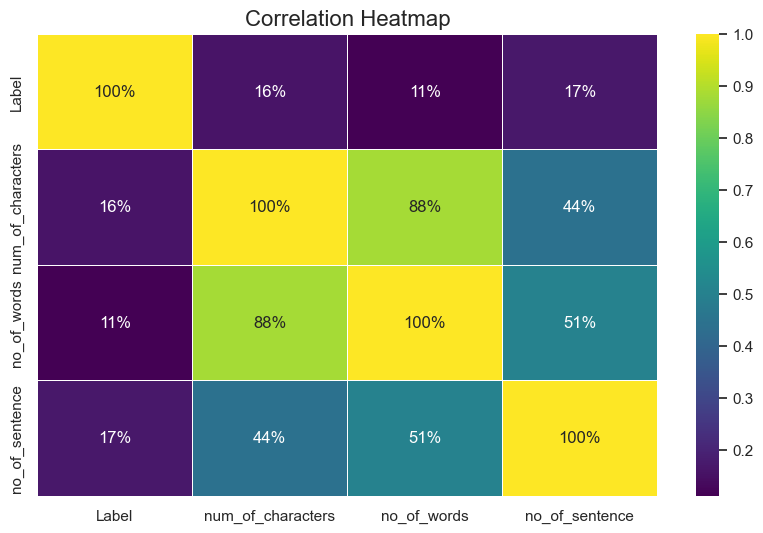

In [67]:
sns.set_palette("viridis")
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5,fmt=".0%")

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

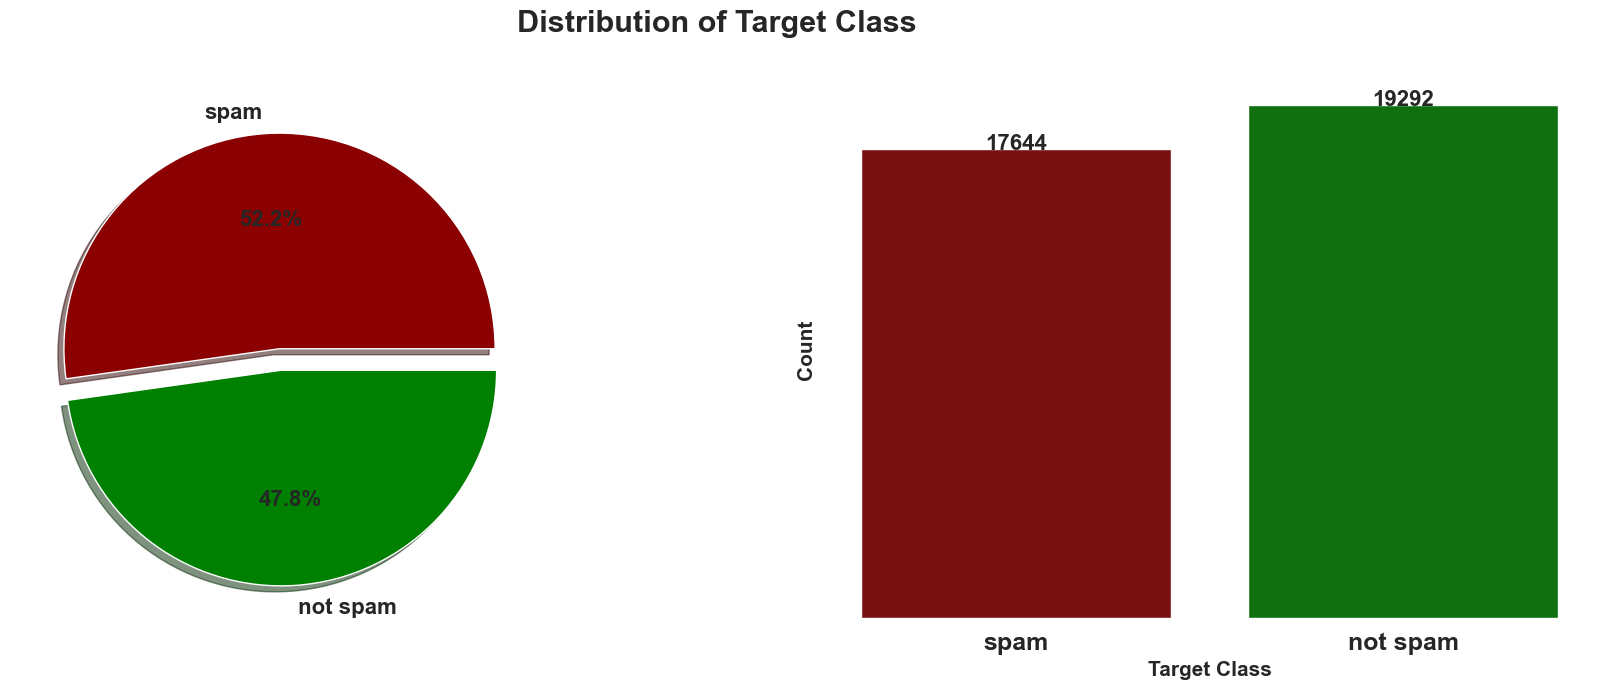

In [68]:
plt.figure(figsize=(22, 7))
plt.suptitle('Distribution of Target Class',weight='bold',fontsize=22)
label_count = df['Label'].value_counts().values
label = df['Label'].value_counts().index

plt.subplot(1, 2, 1)
explode = (0, 0.1)
colors = ['darkred', 'green']
labels = ['spam','not spam']
plt.pie(x=label_count, labels=labels, autopct='%1.1f%%', shadow=True, radius=1, colors=colors, explode=explode,textprops={'fontsize': 16, 'weight': 'bold'})


plt.subplot(1, 2, 2)
colors = ['darkred', 'green']
ax = sns.countplot(x=df['Label'], palette=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),fontsize=16,weight='bold',ha='center')
plt.xticks([0, 1], ['spam', 'not spam'], fontsize=18, weight='bold')
plt.yticks([])
plt.ylabel('Count',fontsize=15,weight='bold')
plt.xlabel('Target Class',fontsize=15,weight='bold')


sns.despine(left=True, bottom=True)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.subplots_adjust(wspace=0.2)
plt.show()

>  * Lower case
>  * Tokenization
>  * Removing speacial characters
>  * Removing stop words
>  * Stemming

In [71]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

ps = PorterStemmer()
# nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum() and i not in stopwords.words('english'):
            y.append(ps.stem(i))
    
    return " ".join(y)

In [72]:
df['Subject']=df['Subject'].apply(transform_text)
df

Subject  Label  \
0                        confidenti soma ci li p ntermin      1   
1                                 çªáüçñ j cbop blraijvv      1   
3                                  stock 0ppurtun sh0ote      1   
4                                      cp l tariff chang      0   
5                               im draft florida project      0   
...                                                  ...    ...   
37884  frustum xanaax tussi0neex c1al1i amb11en ad1pe...      1   
37885                                     get payperview      1   
37886                                 nice mmo want date      1   
37887                                            channel      1   
37888                          q medicin gno q mish cost      1   

       num_of_characters  no_of_words  no_of_sentence  
0                     39           13               1  
1                     68           12               2  
3                     36            5               1  
4                     31            8               1  
5                     27            5               1  
...                  ...          ...             ...  
37884                106           20               1  
37885                 26            3               1  
37886                 26            7               1  
37887                 37            4               1  
37888                 63           23               2  

[36936 rows x 5 columns]

In [73]:
message=df.Subject
message

0                          confidenti soma ci li p ntermin
1                                   çªáüçñ j cbop blraijvv
3                                    stock 0ppurtun sh0ote
4                                        cp l tariff chang
5                                 im draft florida project
                               ...                        
37884    frustum xanaax tussi0neex c1al1i amb11en ad1pe...
37885                                       get payperview
37886                                   nice mmo want date
37887                                              channel
37888                            q medicin gno q mish cost
Name: Subject, Length: 36936, dtype: object

In [74]:
message=message.str.replace('[^a-zA-Z0-9]+',' ')
message

0                          confidenti soma ci li p ntermin
1                                          j cbop blraijvv
3                                    stock 0ppurtun sh0ote
4                                        cp l tariff chang
5                                 im draft florida project
                               ...                        
37884    frustum xanaax tussi0neex c1al1i amb11en ad1pe...
37885                                       get payperview
37886                                   nice mmo want date
37887                                              channel
37888                            q medicin gno q mish cost
Name: Subject, Length: 36936, dtype: object

In [75]:
from nltk.tokenize import word_tokenize
message=message.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
message

0                                  confidenti soma ntermin
1                                            cbop blraijvv
3                                    stock 0ppurtun sh0ote
4                                             tariff chang
5                                    draft florida project
                               ...                        
37884    frustum xanaax tussi0neex c1al1i amb11en ad1pe...
37885                                       get payperview
37886                                   nice mmo want date
37887                                              channel
37888                                medicin gno mish cost
Name: Subject, Length: 36936, dtype: object

In [76]:
df['Transformed_text'] =message

In [77]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
wc = WordCloud(
    width=550,
    height=550,
    min_font_size=12,
    background_color='black'
)

In [78]:
spam_wc=wc.generate(df[df['Label']==1]['Transformed_text'].str.cat(sep=' '))

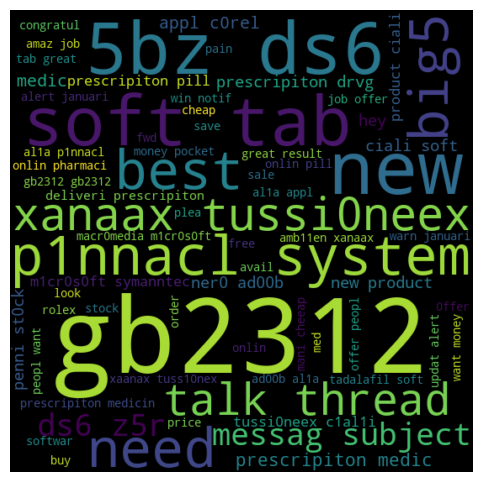

In [79]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

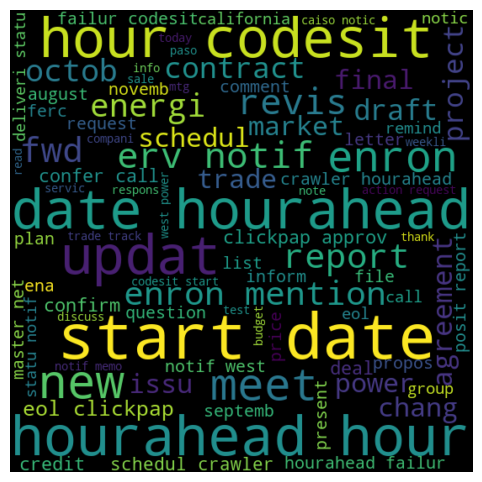

In [80]:
not_spam_wc = wc.generate(df[df['Label']==0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(not_spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
spam_corpus = []
for msg in df[df['Label']==1]['Transformed_text'].tolist():
        for words in msg.split():
            spam_corpus.append(words)

In [82]:
len(spam_corpus)

49643

In [83]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('gb2312', 588),
 ('onlin', 550),
 ('new', 476),
 ('get', 404),
 ('st0ck', 396),
 ('need', 388),
 ('prescripiton', 364),
 ('stock', 314),
 ('med', 289),
 ('medic', 281),
 ('best', 242),
 ('talk', 232),
 ('tab', 230),
 ('pill', 229),
 ('januari', 224),
 ('softwar', 221),
 ('watch', 215),
 ('want', 212),
 ('pain', 211),
 ('great', 199),
 ('save', 197),
 ('free', 195),
 ('ad1pex', 192),
 ('updat', 188),
 ('share', 186),
 ('system', 185),
 ('ciali', 171),
 ('penni', 171),
 ('100', 171),
 ('report', 171)]

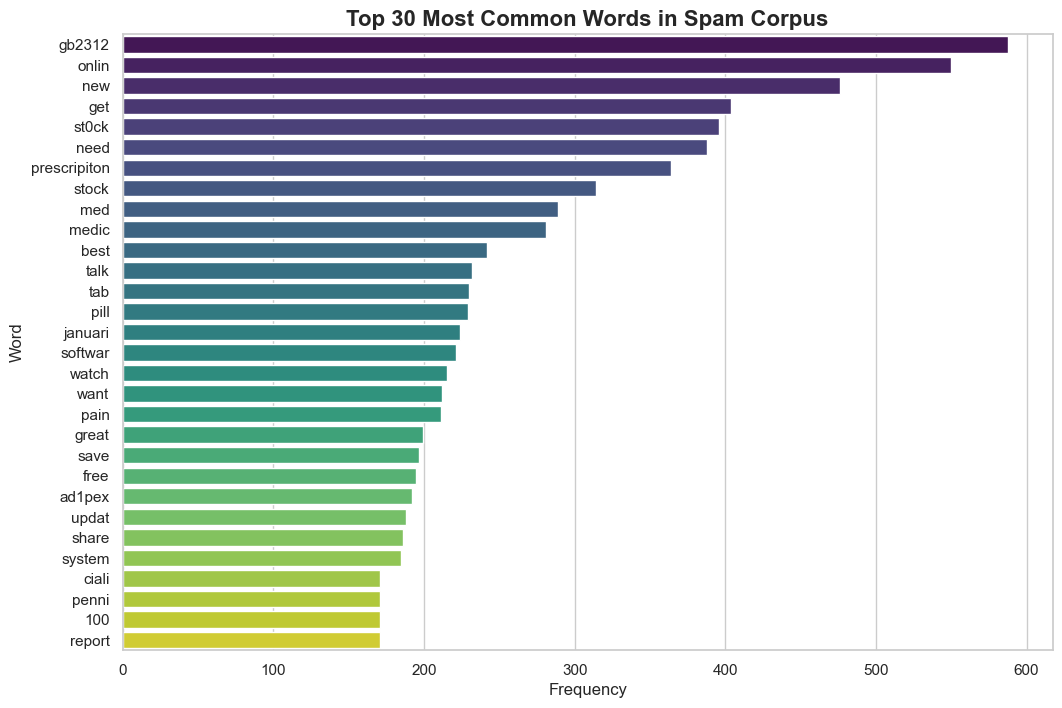

In [87]:
word_frequencies = Counter(spam_corpus).most_common(30)
word_freq_df = pd.DataFrame(word_frequencies, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Corpus',weight='bold',fontsize=16)
plt.show()

In [89]:
non_spam_corpus = []
for msg in df[df['Label']==0]['Transformed_text'].tolist():
        for words in msg.split():
            non_spam_corpus.append(words)

In [90]:
len(non_spam_corpus)

59797

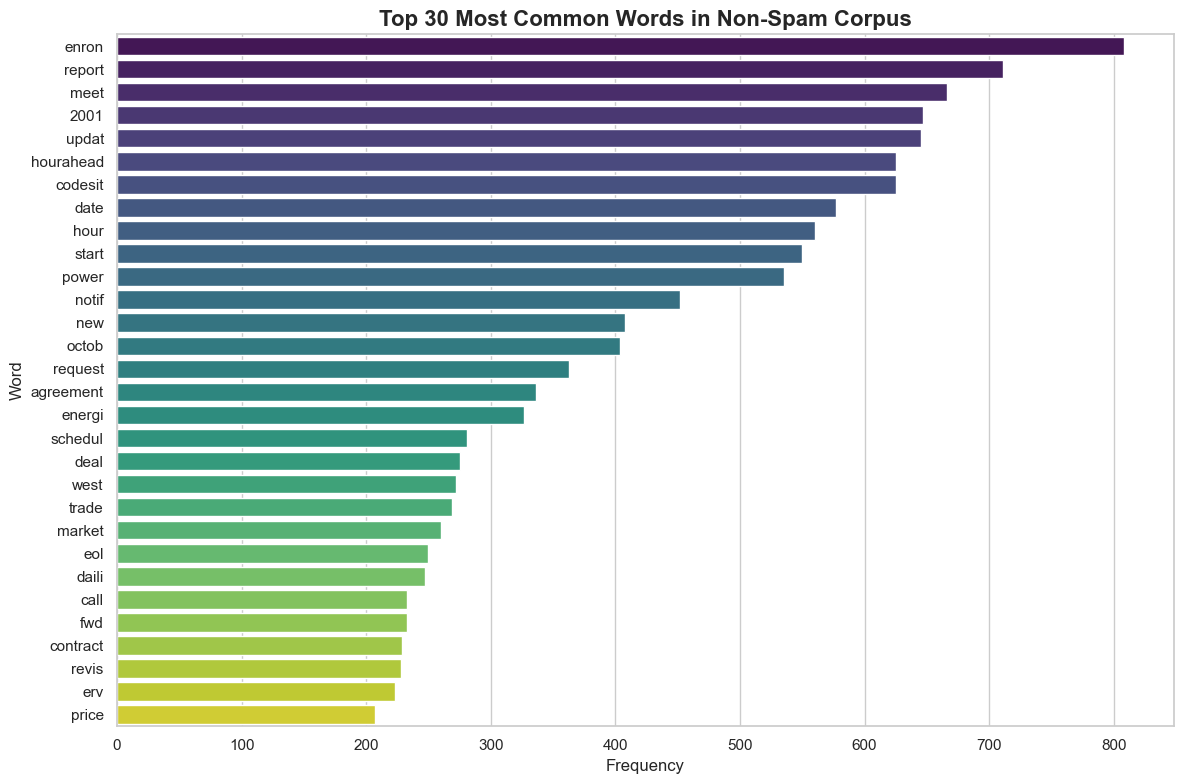

In [92]:
word_frequencies_non_spam = Counter(non_spam_corpus).most_common(30)
word_freq_df_non_spam = pd.DataFrame(word_frequencies_non_spam, columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df_non_spam, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Non-Spam Corpus',weight='bold',fontsize=16)

plt.tight_layout()
plt.show()

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x1=tf.fit_transform(df['Transformed_text']).toarray()

In [116]:
x1.shape

(36936, 12252)

In [117]:
y=df['Label'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [118]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y,test_size=0.30,random_state=42)

In [119]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()

In [123]:
mb.fit(x1train,y1train)
ypred3=mb.predict(x1test)
ypred3
from sklearn.metrics import accuracy_score,classification_report,precision_score
accuracy = accuracy_score(y1test, ypred3)
print('Accuracy:',accuracy)
precision = precision_score(y1test, ypred3)
print(f'Precision: {precision}')

print(classification_report(y1test,ypred3))

Accuracy: 0.914989621875282
Precision: 0.8952614379084968
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5301
           1       0.90      0.95      0.92      5780

    accuracy                           0.91     11081
   macro avg       0.92      0.91      0.91     11081
weighted avg       0.92      0.91      0.91     11081



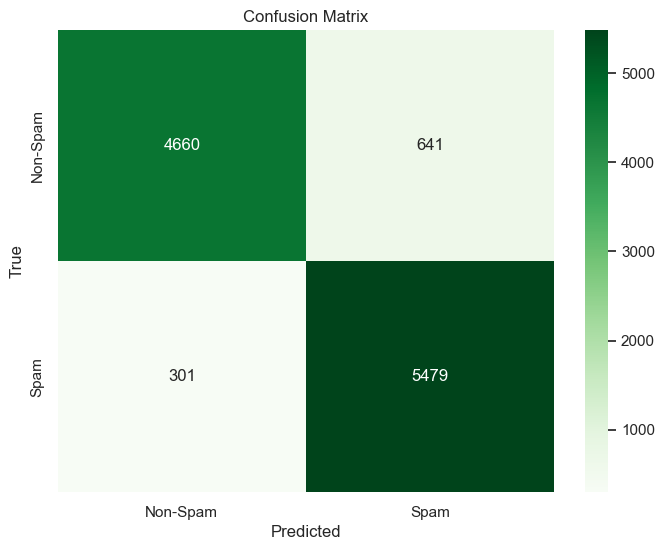

In [127]:
from sklearn.metrics import confusion_matrix
mb.fit(x1train, y1train)
ypred3 = mb.predict(x1test)

conf_matrix = confusion_matrix(y1test, ypred3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [128]:
from sklearn.metrics import accuracy_score, classification_report, precision_score
bb.fit(x1train,y1train)
ypred4=bb.predict(x1test)
ypred4
accuracy = accuracy_score(y1test, ypred4)
print(f'Accuracy: {accuracy}')
precision = precision_score(y1test, ypred4)
print(f'Precision: {precision}')
report = classification_report(y1test, ypred4)
print(report)


Accuracy: 0.9040700297807057
Precision: 0.8732394366197183
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5301
           1       0.87      0.95      0.91      5780

    accuracy                           0.90     11081
   macro avg       0.91      0.90      0.90     11081
weighted avg       0.91      0.90      0.90     11081



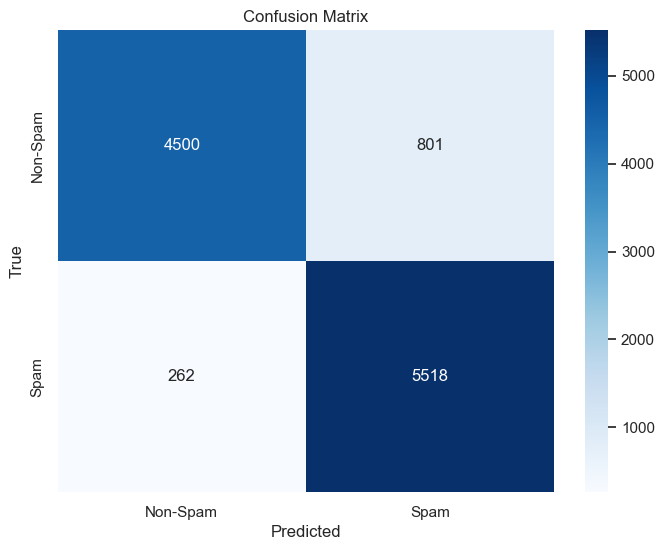

In [129]:
from sklearn.metrics import confusion_matrix
ypred4 = bb.predict(x1test)
conf_matrix = confusion_matrix(y1test, ypred4)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [132]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
scores = cross_val_score(mb, x1train, y1train, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.92017327 0.9220297  0.91553218 0.91428129]
Mean accuracy: 0.9180041105079485
Standard deviation: 0.003196891129397772


>* **Successfully developed an email spam classification model to assist financial institutions in minimizing the impact of spam emails, thereby optimizing data quality and ensuring the integrity of decision-making processes.** 
>* **Improved data quality by addressing issues related to missing values, data types, and special characters within the context of email spam classification.**

In [57]:
import  pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))